In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
import shutil
import glob
import zipfile

In [5]:
import zipfile

def extract_zip(zip_file_path, extract_folder):
    print(f"Archive:  {zip_file_path}")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for member in zip_ref.infolist():
            print(f"  inflating: {member.filename}")
        zip_ref.extractall(extract_folder)

# Example usage
zip_file_path = 'archive.zip'  # Path to your zip file
extract_folder = 'data'  # Folder where you want to extract the files

# Unzip the file
extract_zip(zip_file_path, extract_folder)

print("Extraction completed.")


Archive:  archive.zip
  inflating: data/test/infected/OIP.jpg
  inflating: data/test/infected/R.jpg
  inflating: data/test/infected/WhatsApp Image 2022-04-01 at 3.49.22 PM.jpeg
  inflating: data/test/infected/WhatsApp Image 2022-04-01 at 3.49.45 PM.jpeg
  inflating: data/test/infected/WhatsApp Image 2022-04-01 at 3.50.05 PM.jpeg
  inflating: data/test/infected/WhatsApp Image 2022-04-01 at 3.50.20 PM.jpeg
  inflating: data/test/infected/img1.jpg
  inflating: data/test/infected/img10.jpg
  inflating: data/test/infected/img2.jpg
  inflating: data/test/infected/img3.jpg
  inflating: data/test/infected/img4.jpg
  inflating: data/test/infected/img5.jpg
  inflating: data/test/infected/img6.jpg
  inflating: data/test/infected/img7.jpg
  inflating: data/test/infected/img8.jpg
  inflating: data/test/infected/img_0_1023.jpg
  inflating: data/test/infected/img_0_1033.jpg
  inflating: data/test/infected/img_0_1071.jpg
  inflating: data/test/infected/img_0_1075.jpg
  inflating: data/test/infected/im

In [6]:
ROOT_DIR = 'data/data/test'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
   number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))
   print("",dir,"" ,number_of_images[dir])




 infected  781
 notinfected  1141


In [7]:
import tensorflow

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [6]:
def preprocessingImage1(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function= preprocess_input,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [7]:
def preprocessionfImage2(path):
  """
  Input :path
  Output : preprocessed Image
  """
  image_data  = ImageDataGenerator(preprocessing_function= preprocess_input )
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

  


We will split the data such that 
70% for training 
15 % for vailadation
15 % for testing 



In [12]:
def datafolder(path,split):
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size=(math.floor(split * number_of_images[dir])-5),replace=False):
      
          O = os.path.join(ROOT_DIR,dir,img)
          D = os.path.join("./"+path,dir)
          shutil.copy(O,D)
          os.remove(O)

  else:
     print("Folder already exist")


In [13]:
datafolder("train",0.7)

In [14]:
import os

# Print current working directory
print("Current Working Directory:", os.getcwd())

# Call datafolder function
datafolder("train", 0.7)


Current Working Directory: c:\Users\91999\Desktop\everythin\Power\image\AL
Folder already exist


In [15]:
datafolder("val",0.15)

In [16]:
datafolder("test",0.15)

In [12]:
path ='train'
train_data = preprocessingImage1(path)

Found 1334 images belonging to 2 classes.


In [13]:
path ='test'
test_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.


In [14]:
path = 'val'
val_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.




Model Block




In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet
import keras

In [21]:
base_model = MobileNet(input_shape=(224,224,3),include_top=False)

In [22]:
for layer in base_model.layers:
  layer.trainable = False

In [23]:
x= Flatten()(base_model.output)
x= Dense(units=1,activation='sigmoid')(x)

In [24]:
model = Model(base_model.input,x)

In [25]:
model.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [17]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

mc = ModelCheckpoint(filepath="bestmodel.h5",monitor='val_accuracy',verbose=1,save_best_only=True)

#Early check points
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1)

cb = [mc,es]

In [57]:
train_data

In [62]:
import os

def get_image_type_from_extension(image_path):
    # Split filename and extension
    filename, extension = os.path.splitext(image_path)
    # Return extension in lowercase (e.g., '.jpg')
    return extension.lower()

# Example usage within your training data loop
training_data_paths = ['image1.jpg', 'image2.png', 'image3.jpeg', 'image4.tif']  # Example list of image paths

for image_path in training_data_paths:
    image_type = get_image_type_from_extension(image_path)
    # Check for supported image types (e.g., '.jpg', '.png')
    if image_type in ('.jpg', '.png'):
        # Process image
        print(f"Processing image: {image_path}")
        # ...
    else:
        continue

# Example of calling get_image_type_from_extension with a sample image path
train_image_path = 'train/infected'
print("Image type:", get_image_type_from_extension(train_image_path))


Processing image: image1.jpg
Processing image: image2.png
Image type: 


In [18]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=1,
                           epochs=10,
                           validation_data=val_data,
                           validation_steps=4,
                          callbacks=cb)

C:\Users\91999\AppData\Local\Temp\ipykernel_9936\3592660849.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: 3.2524e-10 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to bestmodel.h5


c:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 6s 6s/step - loss: 3.2524e-10 - accuracy: 1.0000 - val_loss: 8.1270e-08 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: 1.7234e-08 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
1/1 [==============================] - 4s 4s/step - loss: 1.7234e-08 - accuracy: 1.0000 - val_loss: 9.5570e-05 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: 3.7130e-07 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
1/1 [==============================] - 4s 4s/step - loss: 3.7130e-07 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - ETA: 0s - loss: 3.7725e-07 - accuracy: 1.0000
Epoch 4: val_accuracy did not improve from 1.00000
1/1 [==============================] - 4s 4s/step - loss: 3.7725e-07 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 5/10
1/1 [===============

In [28]:
model.save("mybestmodel.h5")

In [1]:
#load from here

In [1]:
from keras.models import load_model

In [2]:
model = load_model("mybestmodel.h5")

In [3]:
from keras.models import model_from_json

# Assuming you have a Keras model named 'model'

# Convert model to JSON format
model_json = model.to_json()

# Write model JSON to a file
with open("model.json", "w") as json_file:
    json_file.write(model_json)


In [4]:
# Load JSON file
with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()

# Load model from JSON
loaded_model = model_from_json(loaded_model_json)

# Now, the 'loaded_model' variable contains your model loaded from the JSON file


In [10]:
path ='train'
train_data = preprocessingImage1(path)

Found 1334 images belonging to 2 classes.


In [15]:
acc = model.evaluate_generator(test_data)[1]
print(f"our model accuracy is  {acc * 100} %")

C:\Users\91999\AppData\Local\Temp\ipykernel_9936\2728078400.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]



our model accuracy is  98.92086386680603 %


 Our model is perform well on the datasets.

The accuracy is 100.0 %

In [16]:
h = hist.history
h.keys()

NameError: name 'hist' is not defined

In [19]:
train_data.class_indices

{'infected': 0, 'notinfected': 1}

In [20]:
test_data.class_indices

{'infected': 0, 'notinfected': 1}

In [21]:
val_data.class_indices

{'infected': 0, 'notinfected': 1}

In [22]:
#now get some random images and predict the class
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


def predictimage(path):
       
      img = tf.keras.utils.load_img(path,target_size=(224,224))
      i = tf.keras.utils.img_to_array(img)/255
      input_arr= np.array([i])
      input_arr.shape

      pred =model.predict(input_arr)
      if pred == 1:
          print("Not Affected")
      else :
         print("Affected")
      #display image
      plt.imshow(input_arr[0],vmin=0, vmax=255)
      plt.title("input Image")
      plt.show()

1/1 [==============================] - 1s 1s/step
Affected


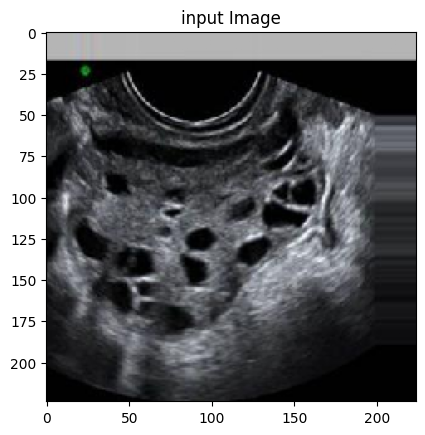

In [23]:
#It is the infected image sample
predictimage("train/infected/img_0_60.jpg") 

1/1 [==============================] - 0s 100ms/step
Not Affected


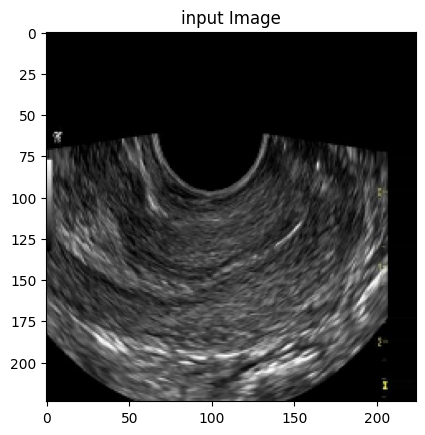

In [42]:
#It is the not affected sample images
predictimage(r"train/notinfected/img_0_11.jpg")

1/1 [==============================] - 0s 75ms/step
Affected


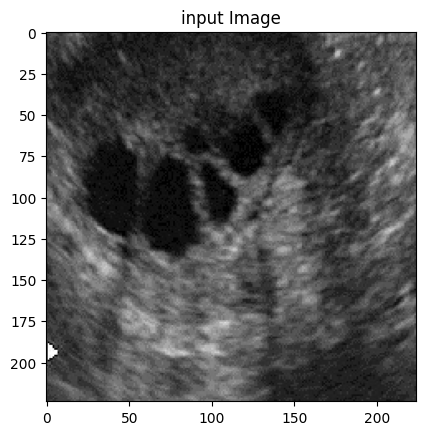

In [24]:
#not infected image

predictimage(r"image.jpg")

In [ ]:
predictimage("/content/PCOS/infected/img_0_9985.jpg")

1/1 [==============================] - 0s 96ms/step
Not Affected


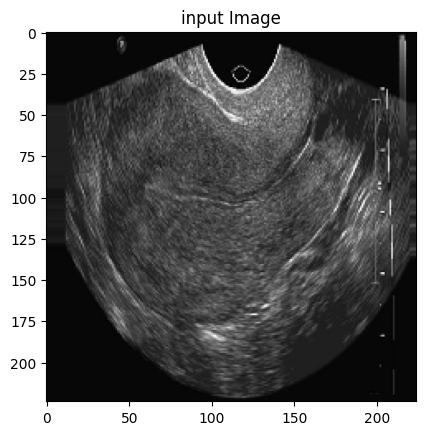

In [26]:
predictimage(r"normal.jpg")